# Talk demo during introduction

In [1]:
! pip install -q torch

## Simulated GRU matrix algebra with dimension issue

In [4]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
nhidden = 256

Whh = torch.eye(nhidden, nhidden)  # Identity matrix
Uxh = torch.randn(d, nhidden)
bh  = torch.zeros(nhidden, 1)
h = torch.randn(nhidden, 1)         # fake previous hidden state h
r = torch.randn(nhidden, 1)         # fake this computation
X = torch.rand(n,d)                 # fake input

# Following code raises an exception
h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)  # state vector update equation

RuntimeError: mat1 and mat2 shapes cannot be multiplied (764x256 and 764x200)

## TensorSensor traps, clarifies, and visualizes issues

In [ ]:
! pip install -q tensor-sensor

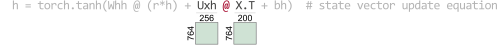

RuntimeError: mat1 and mat2 shapes cannot be multiplied (764x256 and 764x200)
Cause: @ on tensor operand Uxh w/shape [764, 256] and operand X.T w/shape [764, 200]

In [6]:
import tsensor

with tsensor.clarify():
    h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)  # state vector update equation

TensorSensor has augmented the exception object's message with:

```
Cause: @ on tensor operand Uxh w/shape [764, 256] and operand X.T w/shape [764, 200]
```

## Fix error and clarify() does nothing

In [8]:
Uxh = torch.randn(nhidden, d)
with tsensor.clarify():
    h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)  # state vector update equation

In [15]:
r = torch.randn(nhidden, 3)         # fake this computation
# bh = torch.randn(nhidden, 3)         # fake this computation
with tsensor.explain(savefig="/Users/parrt/Desktop/tight.png"):
    r*h
#     h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)  # state vector update equation

RuntimeError: The size of tensor a (3) must match the size of tensor b (200) at non-singleton dimension 1
Cause: * on tensor operand r w/shape [256, 3] and operand h w/shape [256, 200]